## Data Visualization

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
data= pd.read_csv("fortune500.csv")

In [18]:
data.head()

,Year,Rank,Company,Revenue_MM,Profit_MM
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [19]:
data.describe()

,Year,Rank,Revenue_MM
count,25500.00000,25500.000000,25500.000000
mean,1980.00000,250.499765,4273.329635
std,14.71989,144.339963,11351.884979
min,1955.00000,1.000000,49.700000
25%,1967.00000,125.750000,362.300000
50%,1980.00000,250.500000,1019.000000
75%,1993.00000,375.250000,3871.000000
max,2005.00000,500.000000,288189.000000


In [20]:
# data= data.head(400)

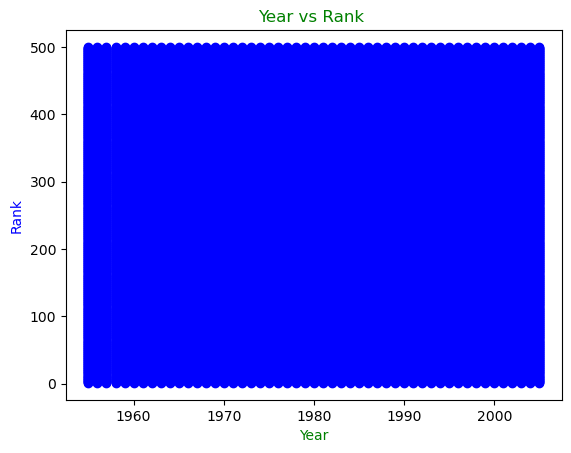

In [21]:
pt.scatter(data["Year"],data["Rank"],color="blue",label="scatter")
pt.xlabel("Year",color="green")
pt.ylabel("Rank",color="blue")
pt.title("Year vs Rank ",color="green")
pt.show()

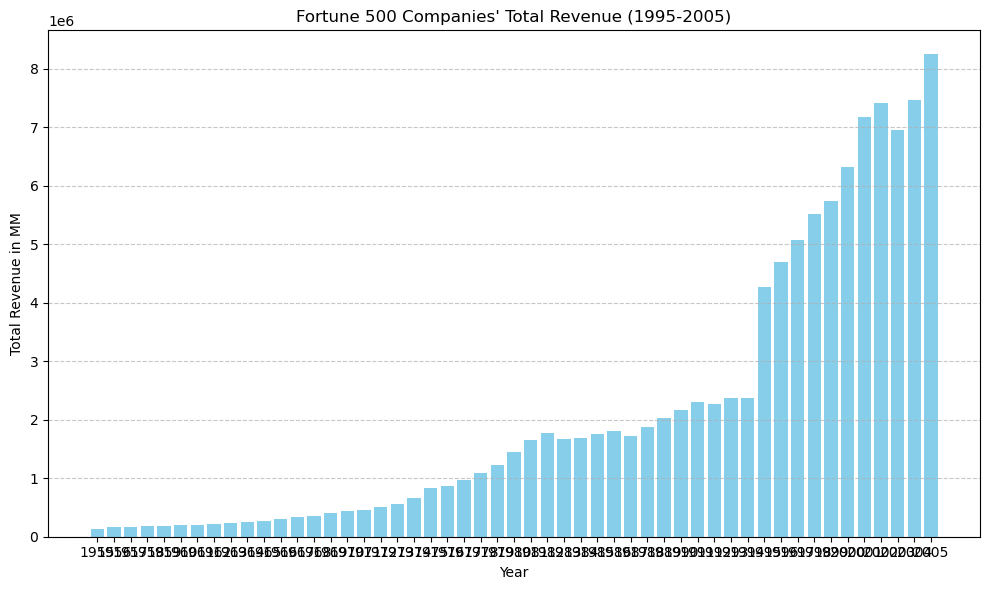

In [22]:
# Group the data by year and sum the revenue for each year
yearly_revenue = data.groupby('Year')['Revenue_MM'].sum().reset_index()

# Create a bar chart to visualize the revenue trends
plt.figure(figsize=(10, 6))
plt.bar(yearly_revenue['Year'], yearly_revenue['Revenue_MM'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Revenue in MM')
plt.title('Fortune 500 Companies\' Total Revenue (1995-2005)')
plt.xticks(yearly_revenue['Year'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

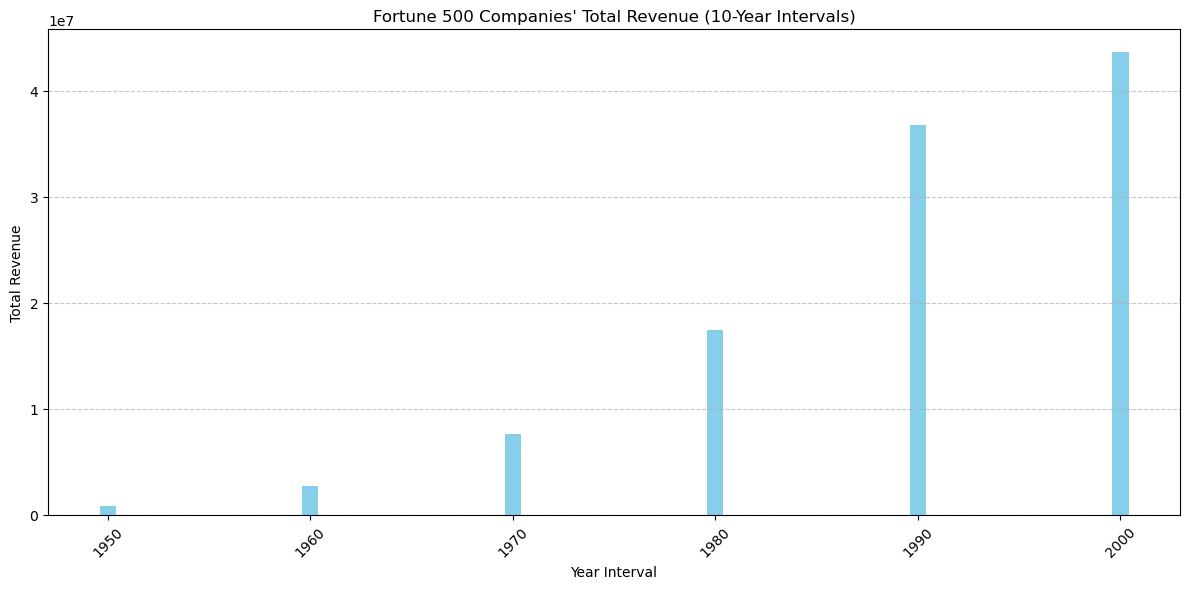

In [29]:
df = pd.read_csv("fortune500_data.csv")

# Extract the year from the 'Year' column
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

# Group the data by 10-year intervals and sum the revenue for each interval
yearly_revenue = df.groupby(df['Year'] // 10 * 10)['Revenue'].sum().reset_index()

# Create a bar chart to visualize the revenue trends in 10-year intervals
plt.figure(figsize=(12, 6))
plt.bar(yearly_revenue['Year'], yearly_revenue['Revenue'], color='skyblue')
plt.xlabel('Year Interval')
plt.ylabel('Total Revenue')
plt.title('Fortune 500 Companies\' Total Revenue (10-Year Intervals)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

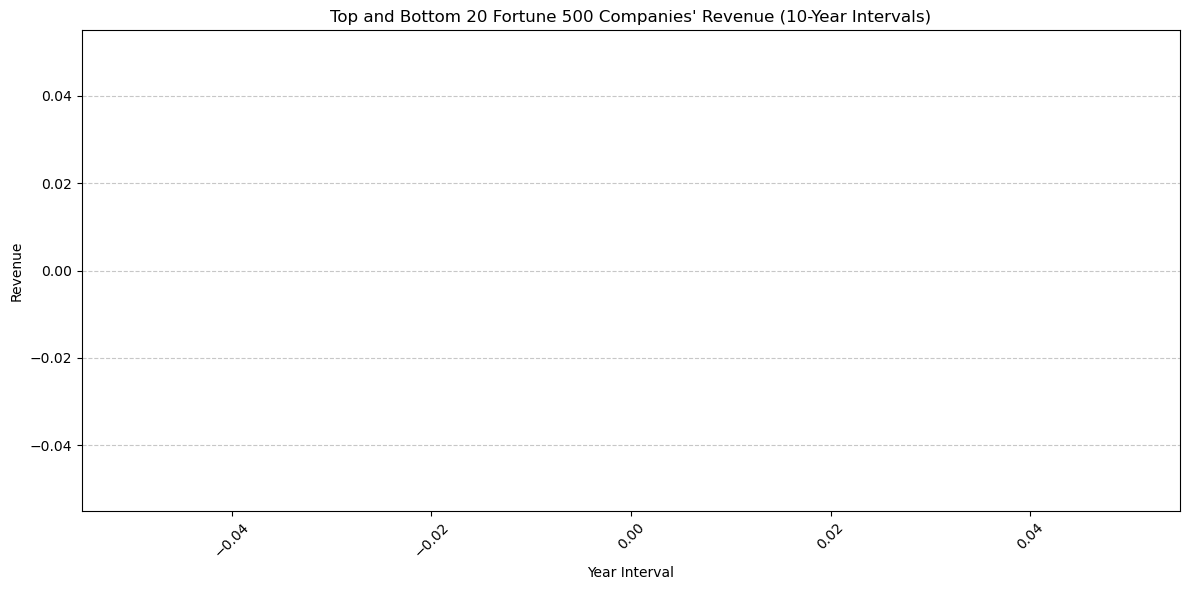

In [30]:
# Load the data from the CSV file
df = pd.read_csv("fortune500_data.csv")

# Extract the year from the 'Year' column
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

# Group the data by 10-year intervals and sort by revenue within each interval
yearly_revenue = df.groupby(df['Year'] // 10 * 10).apply(lambda group: group.sort_values('Revenue', ascending=False)).reset_index(drop=True)

# Create a DataFrame to store the top and bottom 20 companies for each 10-year interval
top_bottom_companies = pd.DataFrame(columns=['Year Interval', 'Rank', 'Company', 'Revenue'])

# Iterate through each 10-year interval
for interval, group in yearly_revenue.groupby('Year'):
    # Get the top 20 and bottom 20 companies for each interval
    top_20 = group.head(20)
    bottom_20 = group.tail(20)
    
    # Add the top 20 and bottom 20 companies to the DataFrame
    top_bottom_companies = pd.concat([top_bottom_companies, top_20, bottom_20])

# Create a bar chart to visualize the revenue of the selected companies in 10-year intervals
plt.figure(figsize=(12, 6))
plt.bar(top_bottom_companies['Year Interval'], top_bottom_companies['Revenue'], color='skyblue')
plt.xlabel('Year Interval')
plt.ylabel('Revenue')
plt.title('Top and Bottom 20 Fortune 500 Companies\' Revenue (10-Year Intervals)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

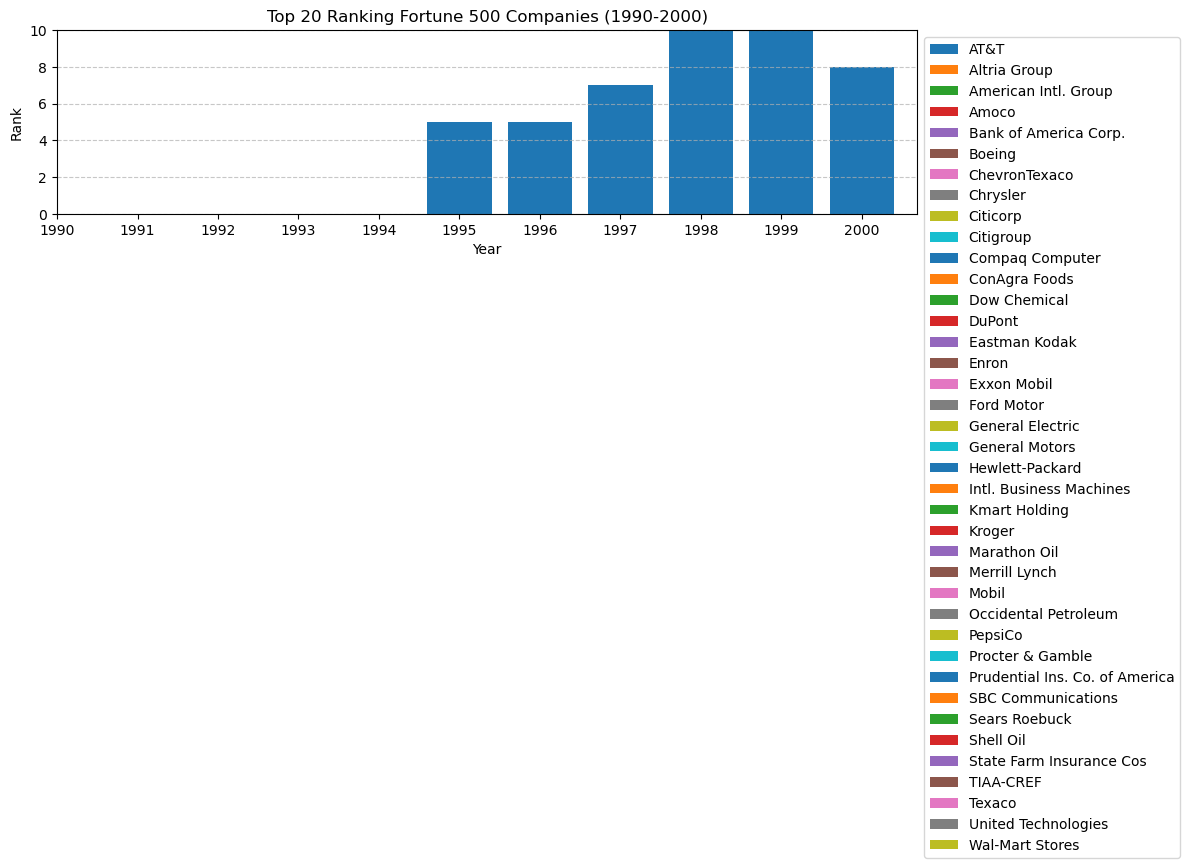

In [31]:
# Load the data from the CSV file
df = pd.read_csv("fortune500_data.csv")

# Filter the data for the years 1990 to 2000 and select the top 20 ranking companies for each year
filtered_df = df[(df['Year'] >= 1990) & (df['Year'] <= 2000)]
top_20_companies = filtered_df.groupby('Year').apply(lambda group: group.nsmallest(20, 'Rank')).reset_index(drop=True)

# Create a pivot table to prepare the data for a stacked bar chart
pivot_table = top_20_companies.pivot(index='Year', columns='Company', values='Rank')

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
bottom = None

for company in pivot_table.columns:
    plt.bar(
        pivot_table.index, 
        pivot_table[company], 
        bottom=bottom,
        label=company
    )
    if bottom is None:
        bottom = pivot_table[company]
    else:
        bottom += pivot_table[company]

plt.xlabel('Year')
plt.ylabel('Rank')
plt.title('Top 20 Ranking Fortune 500 Companies (1990-2000)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(pivot_table.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

In [34]:
# Load the data from the CSV file
df = pd.read_csv("fortune500_data.csv")

# Create an empty DataFrame to store the top 20 companies by year
top_20_companies_by_year = pd.DataFrame(columns=df.columns)

# Iterate through each year
for year in range(1990, 2001):  # Change the range to your desired years
    # Filter the data for the current year and select the top 20 ranking companies
    top_20 = df[df['Year'] == year].sort_values(by='Rank').head(20)
    
    # Append the top 20 companies for the current year to the new DataFrame
    top_20_companies_by_year = pd.concat([top_20_companies_by_year, top_20], ignore_index=True)

# Save the new DataFrame to a CSV file if needed
top_20_companies_by_year.to_csv("top_20_companies_by_year.csv", index=False)

# Display the new DataFrame
print(top_20_companies_by_year)

     Year Rank                  Company   Revenue  Profit
0    1990    1           General Motors  126974.3  4224.3
1    1990    2               Ford Motor   96932.6    3835
2    1990    3              Exxon Mobil   86656.0    3510
3    1990    4  Intl. Business Machines   63438.0    3758
4    1990    5         General Electric   55264.0    3939
..    ...  ...                      ...       ...     ...
215  2000   16            Sears Roebuck   41071.0    1453
216  2000   17     American Intl. Group   40656.1  5055.4
217  2000   18                    Enron   40112.0     893
218  2000   19                TIAA-CREF   39410.2  1024.1
219  2000   20          Compaq Computer   38525.0     569

[220 rows x 5 columns]


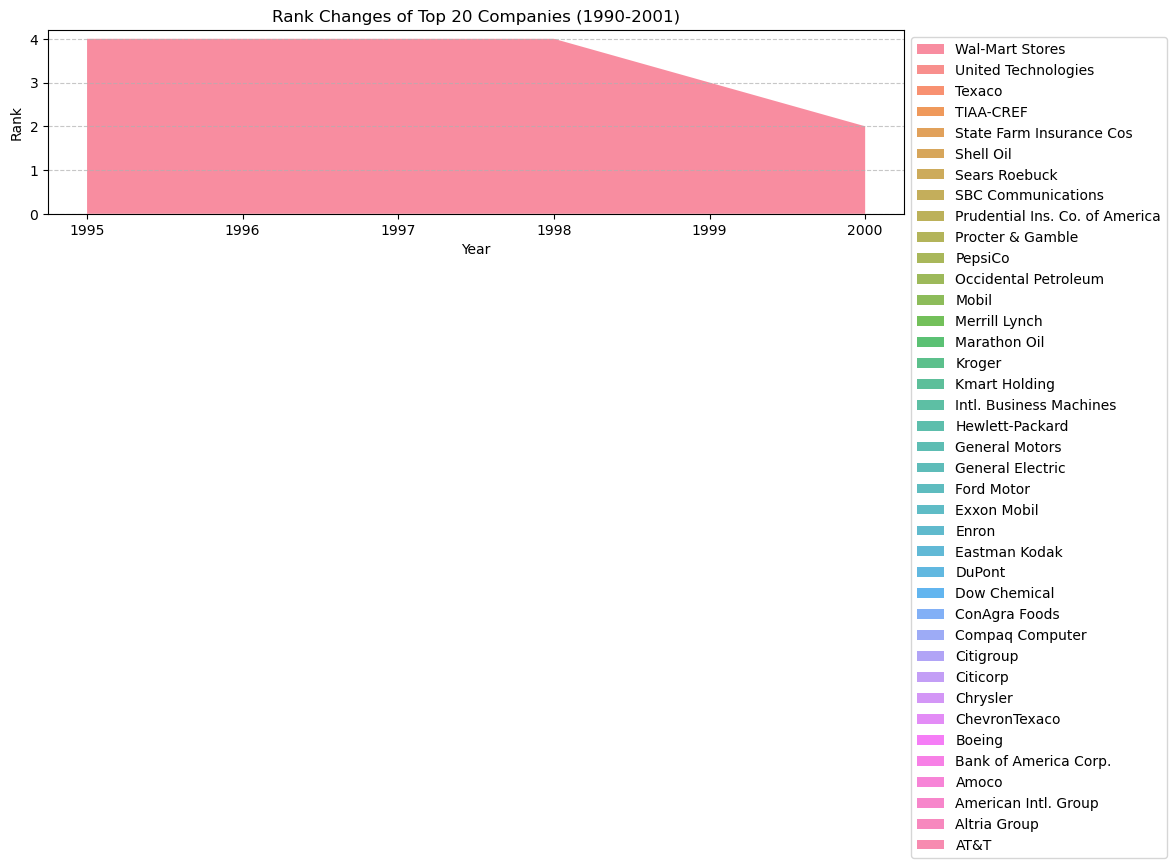

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
df = pd.read_csv("top_20_companies_by_year.csv")

# Pivot the data to have 'Company' as columns and 'Year' as index
pivot_table = df.pivot(index='Year', columns='Company', values='Rank')

# Reverse the order of columns to show the companies in the same order from 1990 to 2001
pivot_table = pivot_table[pivot_table.columns[::-1]]

# Create a stacked area chart to visualize rank changes over time
plt.figure(figsize=(12, 6))
sns.set_palette("husl", len(pivot_table.columns))
plt.stackplot(pivot_table.index, pivot_table.values.T, labels=pivot_table.columns, alpha=0.8)

plt.xlabel('Year')
plt.ylabel('Rank')
plt.title('Rank Changes of Top 20 Companies (1990-2001)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

In [ ]:
pt.scatter(data["rollno"],data["cgpa"],color="blue",label="scatter")
pt.xlabel("RollNo",color="green")
pt.ylabel("CGPA",color="blue")
pt.title("CGPA vs Roll No",color="green")
pt.plot(data["rollno"],data["cgpa"],color="red",label="line graph")
pt.legend()
pt.show()

In [ ]:
data = pd.read_csv("data/cgpa.csv")
data= data.head(30)

In [ ]:
pt.bar(data["rollno"],data["cgpa"],color=["green","blue","pink","red"])
pt.xlabel("RollNo",color="green")
pt.ylabel("CGPA",color="blue")
pt.title("CGPA vs Roll No",color="green")
pt.show()

In [ ]:
import matplotlib.pyplot as pt
import pandas as pd

In [ ]:
data = pd.read_csv("data/cgpa.csv")
data = data.head(30)

In [ ]:
x=len(data[data.cgpa>=9])
x1=len(data[(data.cgpa>=8) & (data.cgpa<9)])
x2=len(data[data.cgpa<8])
pt.axis('equal')
pt.pie([x,x1,x2],colors=['yellow','red','blue'],labels=['9 points','8 points','others'])
pt.legend(title='Description')
pt.show()

In [ ]:
age_data = [20,30,54,66,70,10,45,65,77,99,120,130,29,40,80,75,90]

In [ ]:
bins=[0,10,20,30,40,50,60,70,80,90,100,110,120]

In [ ]:
pt.hist(age_data,bins,histtype='bar', rwidth=0.8)
pt.title('Age distribution')
pt.xlabel('Age')
pt.ylabel('People')
pt.show()

In [ ]:
import matplotlib.pyplot as pt
from mpl_toolkits.mplot3d import axes3d

fig = pt.figure(figsize=(10,10))

ax = fig.add_subplot(111,projection='3d')

x,y,z = axes3d.get_test_data(0.05)

ax.plot_wireframe(x,y,z, rstride=10 ,cstride=10)
pt.show()